<a href="https://colab.research.google.com/github/Riyasawalkar/Churn-Data-Analysis/blob/main/Customer_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
data.shape

(541909, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#this command provide a concise way to understand  the extend of meassing data in each column of the dataframe
#which is cruncial for data cleaning and preprocessing step in data analysis

round(data.isna().sum()*100/len(data),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [ ]:
#it is the buit in methods in pandas that removes the rows and the column with dose not contain any of the value
data.dropna(inplace=True)

In [ ]:
data['CustomerID']=data['CustomerID'].astype('str')
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'],format="%d-%m-%Y  %H:%M")

In [ ]:
data2 = pd.DataFrame(data.groupby('CustomerID')['InvoiceNo'].count().reset_index())
data2.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
data['Amount']=data['Quantity']*data['UnitPrice']

In [ ]:
data=data[data['UnitPrice']>0]

In [ ]:
data=data[data['Amount']>0]

In [ ]:
data.shape

(530104, 9)

In [ ]:
desc_df=data['Description'].value_counts().reset_index()

In [ ]:
desc_df=desc_df.rename(columns={'index':'Description','Description':'Count'})

In [ ]:
desc_df.head()

,Count,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2323
1,JUMBO BAG RED RETROSPOT,2112
2,REGENCY CAKESTAND 3 TIER,2017
3,PARTY BUNTING,1706
4,LUNCH BAG RED RETROSPOT,1594


AttributeError: module 'matplotlib.pyplot' has no attribute 'xticksI'

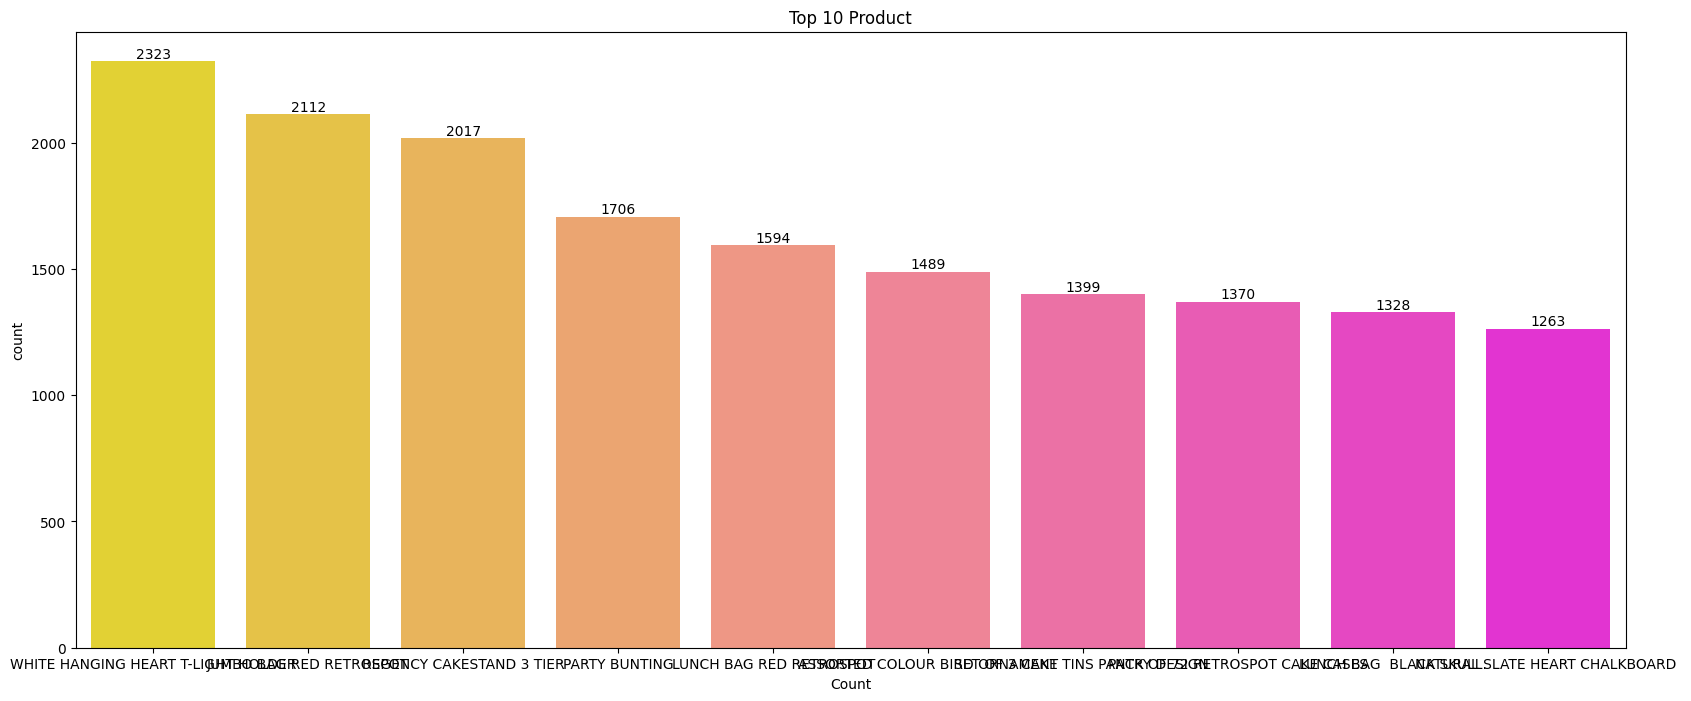

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.barplot(data=desc_df[:10],x='Count',y='count',palette='spring_r')
for bar in ax.containers:
   ax.bar_label(bar)

plt.title('Top 10 Product')
plt.xticksI(rotation=90)
plt.show()

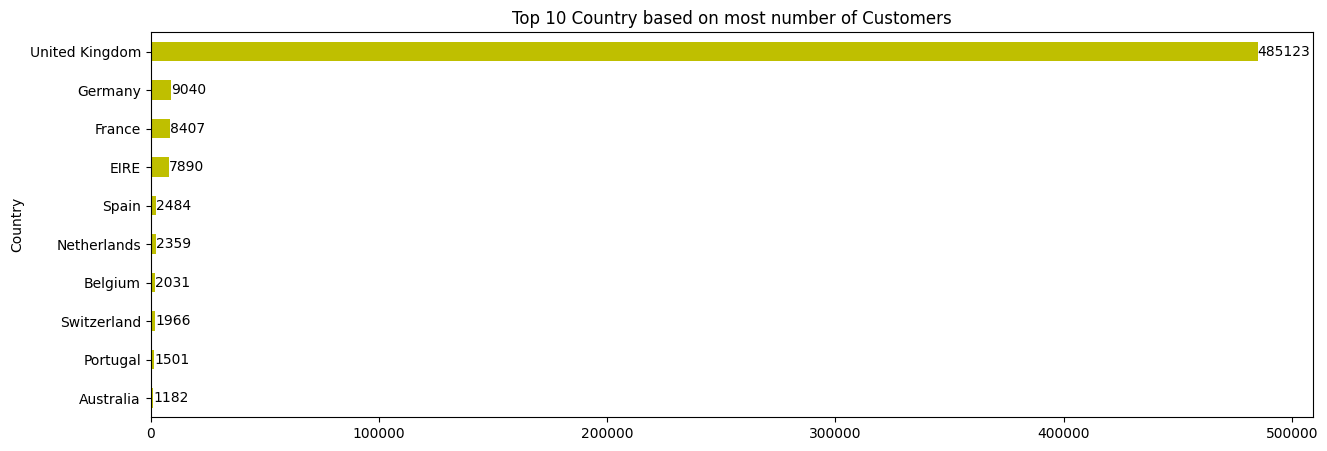

In [ ]:
plt.figure(figsize=(15,5))
ax = data['Country'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh',color='y')
for bar in ax.containers:
    ax.bar_label(bar)

plt.title('Top 10 Country based on most number of Customers')
plt.show()

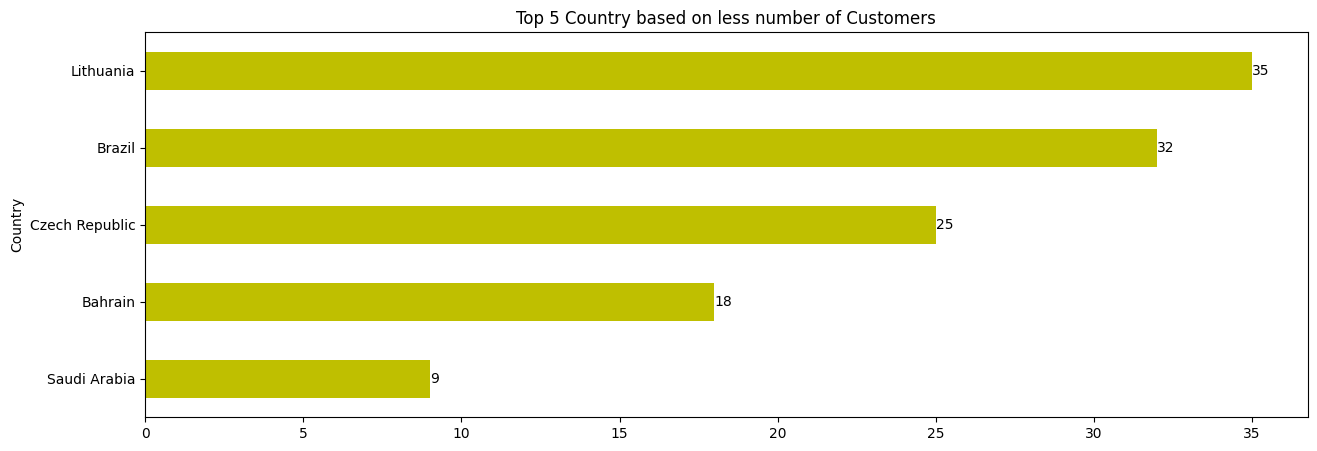

In [ ]:
plt.figure(figsize=(15,5))
ax = data['Country'].value_counts()[-5:].sort_values(ascending=True).plot(kind='barh',color='y')
for bar in ax.containers:
    ax.bar_label(bar)

plt.title('Top 5 Country based on less number of Customers')
plt.show()

In [ ]:
#here it uses the dt to access the datetime property of the data
data['Month'] = data['InvoiceDate'].dt.month_name()

In [ ]:
data.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December


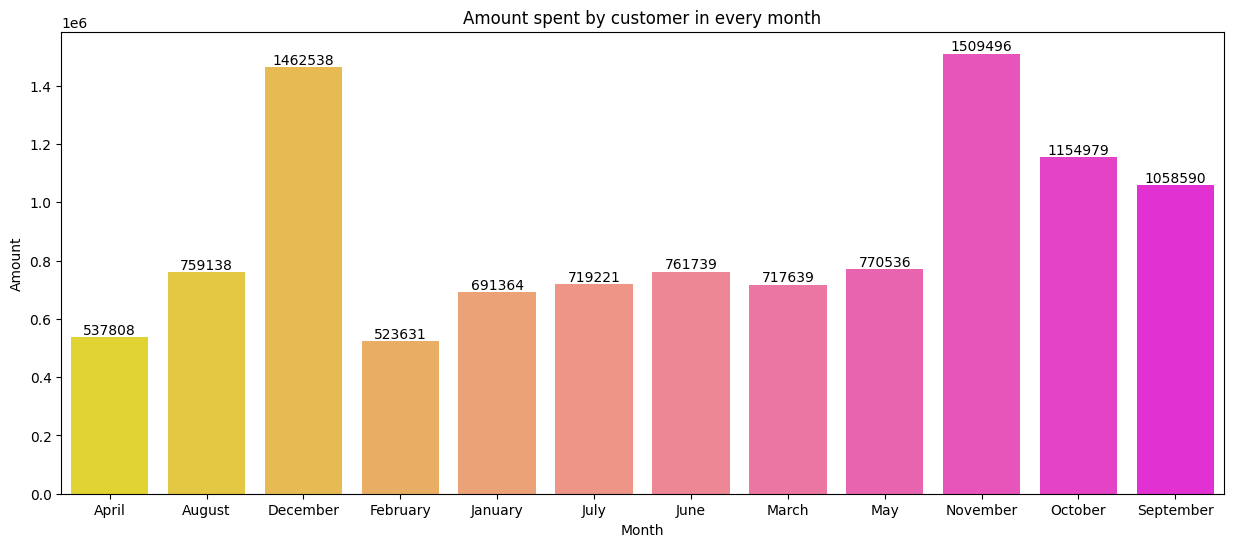

In [ ]:
plt.figure(figsize=(15,6))
month_df = data.groupby('Month')['Amount'].sum().reset_index()
ax = sns.barplot(data=month_df,x='Month',y='Amount',palette='spring_r')
for bar in ax.containers:
    ax.bar_label(bar,fmt='%d')
plt.title('Amount spent by customer in every month')
plt.show()

In [ ]:
data['Hour'] = data['InvoiceDate'].dt.hour
hour_df = data['Hour'].value_counts().reset_index()
hour_df = hour_df.rename(columns={'index':'Hour','Hour':'Count'})
hour_df

,Count,count
0,12,77120
1,15,76246
2,13,71001
3,14,65937
4,11,56139
5,16,53369
6,10,47822
7,9,33701
8,17,27563
9,8,8800


In [ ]:
#dividing the time into morning afternoon and evening
def convert_time(time):
    if (time >=6 and time<=11):
        return 'Morning'
    elif (time>=12 and time<=17):
        return 'Afternoon'
    else:
        return 'Evening'

In [ ]:
hour_df['time_type'] = hour_df['Count'].apply(convert_time)

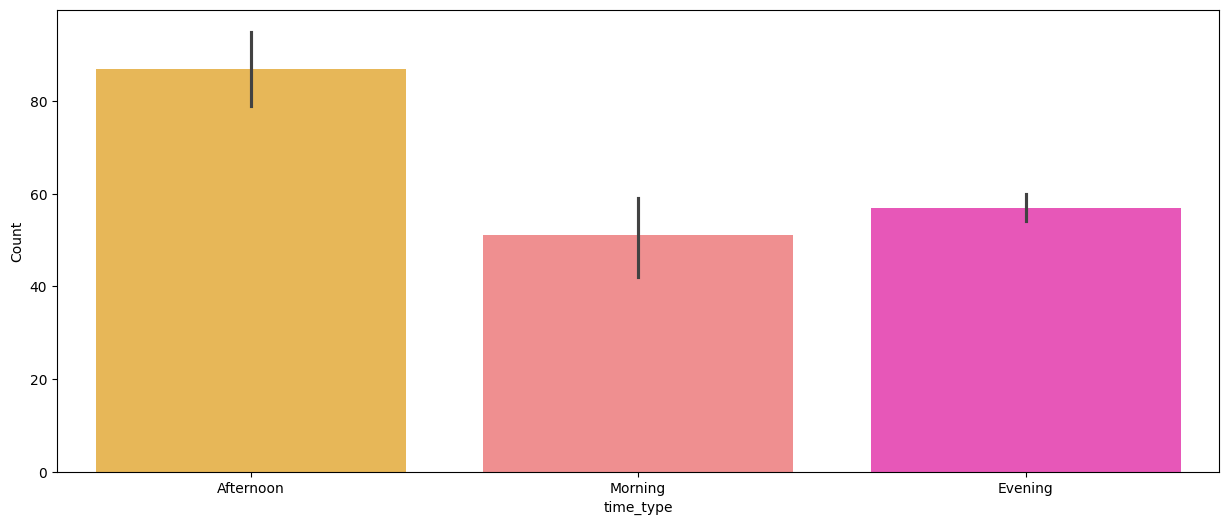

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=hour_df,x='time_type',y='Count',estimator='sum',palette='spring_r')
plt.show()

In [ ]:
#how many total amount is to be spend
amount_spent = data.groupby('CustomerID')['Amount'].sum().reset_index()
amount_spent.head()

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
#here after that we find the frequency means the how frequently it occure
customer_frequency= data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
customer_frequency = customer_frequency.rename(columns={'InvoiceNo':'Frequency'})
customer_frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
#The purpose of this merge is to combine the total amount spent by each customer and their purchase frequency into a single DataFrame.
merge_df = pd.merge(amount_spent,customer_frequency,on='CustomerID',how='inner')
merge_df.head()

,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
# recency max() function will return the most recent date
max_date = max(data['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
data['diff'] = max_date - data['InvoiceDate']

In [ ]:
customer_recency = data.groupby('CustomerID')['diff'].min().reset_index()
customer_recency.head()

,CustomerID,diff
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [ ]:
customer_recency['diff'] = customer_recency['diff'].dt.days
customer_recency.head()

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [ ]:
final_df = pd.merge(merge_df,customer_recency,on='CustomerID',how='inner')
final_df = final_df.rename(columns={'diff':'Recency'})
final_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


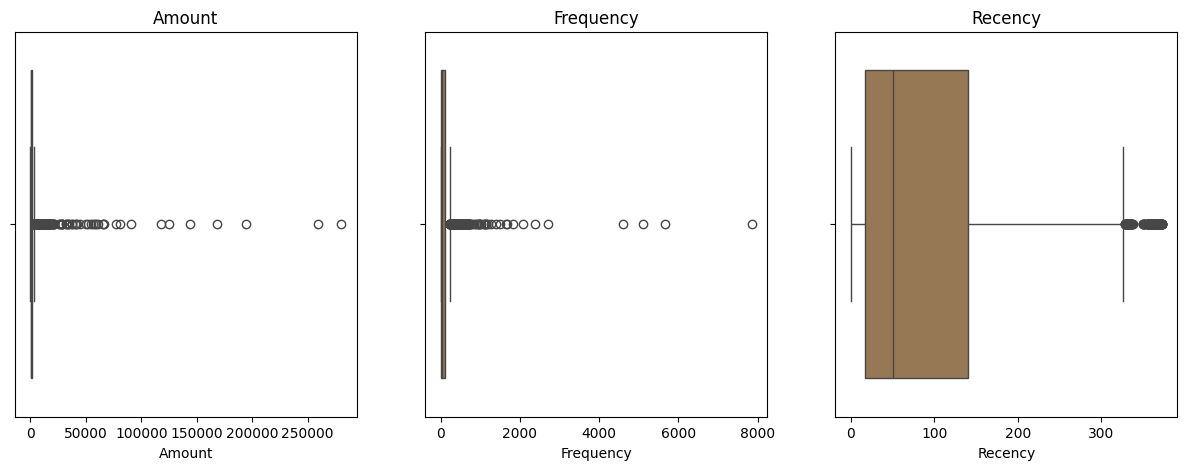

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.boxplot(ax=axes[0],data=final_df,x='Amount',palette='cubehelix')
axes[0].set_title('Amount')

sns.boxplot(ax=axes[1],data=final_df,x='Frequency',palette='cubehelix')
axes[1].set_title('Frequency')

sns.boxplot(ax=axes[2],data=final_df,x='Recency',palette='cubehelix')
axes[2].set_title('Recency')


plt.show()

In [ ]:
Q1 = final_df['Amount'].quantile(0.05)
Q3 = final_df['Amount'].quantile(0.95)
IQR = Q3-Q1
final_df = final_df[(final_df['Amount'] >= Q1 - 1.5*IQR) & (final_df['Amount'] <= Q1 + 1.5*IQR)]


Q1 = final_df['Frequency'].quantile(0.05)
Q3 = final_df['Frequency'].quantile(0.95)
IQR = Q3-Q1
final_df = final_df[(final_df['Frequency'] >= Q1 - 1.5*IQR) & (final_df['Frequency'] <= Q1 + 1.5*IQR)]


Q1 = final_df['Recency'].quantile(0.05)
Q3 = final_df['Recency'].quantile(0.95)
IQR = Q3-Q1
final_df = final_df[(final_df['Recency'] >= Q1 - 1.5*IQR) & (final_df['Recency'] <= Q1 + 1.5*IQR)]

In [ ]:
scale_features = final_df[['Amount','Frequency','Recency']]

scaling = StandardScaler()
scaled_df = pd.DataFrame(scaling.fit_transform(scale_features))

In [ ]:
scaled_df.columns=['Amount','Frequency','Recency']

In [ ]:
scaled_df.head(10)

,Amount,Frequency,Recency
0,2.345164,1.581755,-0.936916
1,0.486104,-0.475686,-0.211811
2,0.456740,0.096582,-0.768056
3,-0.596175,-0.666443,2.122431
4,1.010508,0.260087,-0.599196
5,-0.777733,-0.843573,1.069539
6,-0.044988,-0.107800,1.347661
7,-0.503694,-0.720944,1.168868
8,1.236450,-0.094174,-0.728325
9,3.749151,0.886857,-0.628995


In [ ]:
# K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(scaled_df)

KMeans(max_iter=50, n_clusters=4)

In [ ]:
kmeans.labels_

array([0, 1, 3, ..., 2, 1, 3], dtype=int32)

In [ ]:
set(kmeans.labels_)

{0, 1, 2, 3}

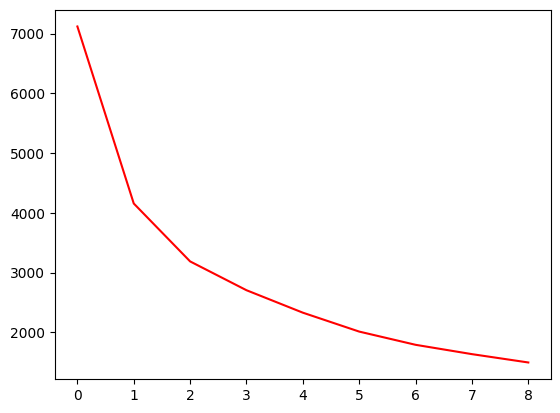

In [ ]:
cluster = []
range_n_cluster = [2,3,4,5,6,7,8,9,10]

for num_cluster in range_n_cluster:
    kmeans = KMeans(n_clusters=num_cluster,max_iter=50)
    kmeans.fit(scaled_df)

    cluster.append(kmeans.inertia_)
plt.plot(cluster,color='r')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3,max_iter=300)
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

In [ ]:
final_df['Clsuter_ID'] = kmeans.predict(scaled_df)
final_df.head()

,CustomerID,Amount,Frequency,Recency,Clsuter_ID
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,0
5,12352.0,2506.04,85,35,2


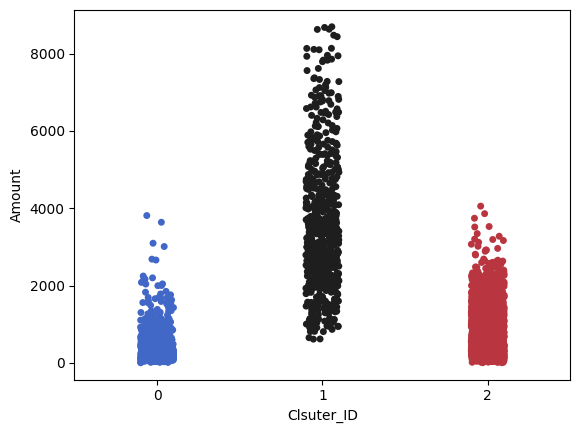

In [ ]:
sns.stripplot(x=final_df['Clsuter_ID'],y='Amount',data=final_df,palette='icefire')
plt.show()

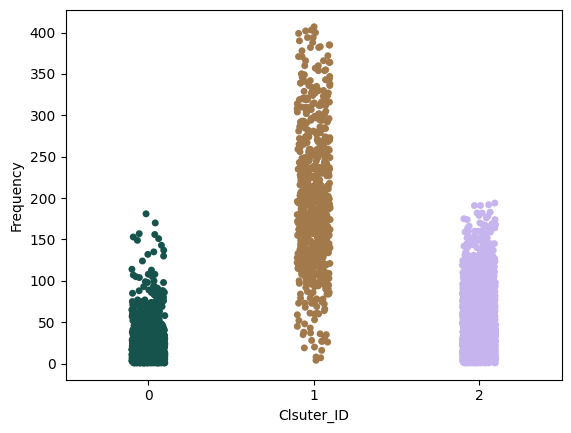

In [ ]:
sns.stripplot(x=final_df['Clsuter_ID'],y='Frequency',data=final_df,palette='cubehelix')
plt.show()

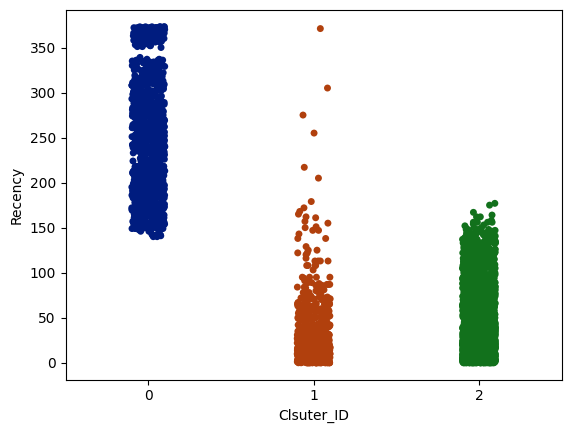

In [ ]:
sns.stripplot(x=final_df['Clsuter_ID'],y='Recency',data=final_df,palette='dark')
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = px.scatter_3d(
    final_df,
    x='Amount',
    y='Frequency',
    z='Recency',
    color='Clsuter_ID',
    title='3D Scatter Plot of Clusters',
    labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency'}
)

# Show the plot
fig.show()

In [ ]:
import joblib
with open('customer-segmentation-model.joblib','wb') as f:
    joblib.dump(kmeans,f)